
<br><br>

### Considere o dataset abaixo:

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skll
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import sklearn.neighbors as skln
from sklearn.tree import DecisionTreeRegressor

In [371]:
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


In [372]:
df.corr()[["crimes"]]

,crimes
ind_pop_cid,0.067237
perc_pol,-0.377929
taxa_crim,0.578659
nivel_ed,-0.200762
crimes,1.000000


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)


In [373]:
df_treino,df_teste=train_test_split(df,test_size=0.25,random_state=0)

In [374]:
df_teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
2446,5.0,25.773806,58.707768,9.0,24
289,4.0,32.106588,75.536847,1.0,145
1683,1.0,27.081375,74.971017,9.0,27
1073,1.0,7.094290,56.664333,5.0,107
2205,3.0,15.005452,67.619857,1.0,320
...,...,...,...,...,...
898,1.0,10.662743,88.380754,6.0,309
825,3.0,7.176919,64.062228,2.0,310
1117,3.0,0.121806,31.245216,8.0,78
483,2.0,15.763320,87.142315,8.0,299



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

In [375]:
df1=df_treino
df2=df_teste

In [376]:
lr=skll.LinearRegression()

In [377]:
x=df_treino.drop('crimes', axis = 1)
y=df_treino.crimes

In [378]:
lr.fit(x,y)

LinearRegression()

In [379]:
y_pred=lr.predict(x)

In [380]:
y_pred

array([228.55092663, 260.5250219 ,  96.91066368, ...,  96.34043149,
         3.42544406, 513.87286158])

In [381]:
def rmse(y,y_pred):
    return np.sqrt(np.mean((y-y_pred)**2))

In [382]:
rmse(y=y,y_pred=y_pred)

36.40473088092739

In [383]:
x1=df1.drop('crimes', axis = 1)
y1=df1.crimes

In [384]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = x1, 
                             y = y1, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[0.90393664 0.90450859 0.91141415 0.91357841 0.90617345]
media:  0.9079222467969469
desvio padrão:  0.0038673484896434855


Acima, temos o resultado do R2 médio para os 5 folds de validação no modelo de regressão linear.
Lembrando que o R2 em treino foi de 0.90, temos uma ótima performance no dataset e não está overfitando, uma vez que as métricas em treino e cross-validação estão se mantendo.

Ainda, destacamos que o desvio padrão do R2 nos folds de validação é baixo, mostrando uma estabilidade do modelo.

In [385]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(x1, y1)
    
    preds = knn.predict(x1)
    
    rmse_train = RMSE(ytrue = y1, ypred = preds)
    r2_train = r2_score(y_true = y1, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:0.0 / R2: 1.0
K = 2 | RMSE:21.93 / R2: 0.97
K = 5 | RMSE:27.8 / R2: 0.95
K = 10 | RMSE:30.57 / R2: 0.94
K = 20 | RMSE:33.31 / R2: 0.92
K = 50 | RMSE:38.33 / R2: 0.9


In [386]:
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(x1, y1)
    
    preds = dt.predict(x1)
    
    rmse_train = RMSE(ytrue = y1, ypred = preds)
    r2_train = r2_score(y_true = y1, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:103.36 / R2: 0.27
Profundidade da árvore = 5 | RMSE:45.41 / R2: 0.86
Profundidade da árvore = 10 | RMSE:15.43 / R2: 0.98
Profundidade da árvore = 100 | RMSE:0.0 / R2: 1.0


In [387]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = x1, 
                                 y = y1, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(x1, y1)
    r2_train = r2_score(y_true=y1, y_pred=modelo.predict(x1))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

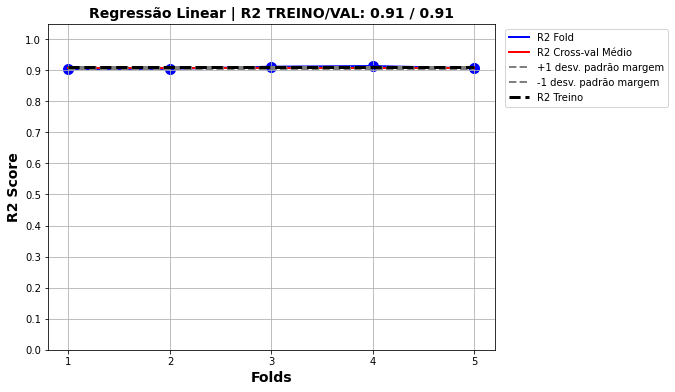

In [359]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = x1, 
                           y = y1, 
                           num_folds = 5)

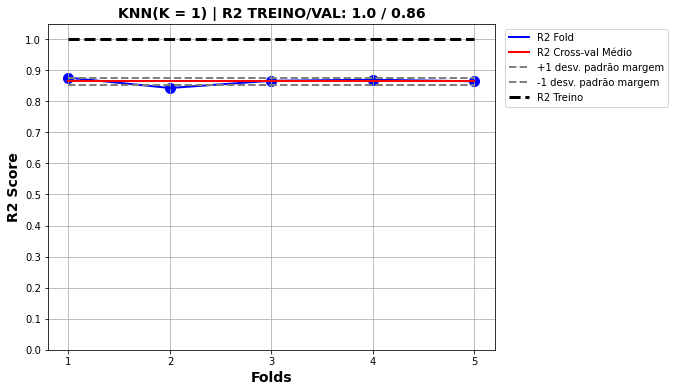

In [360]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = x1, 
                           y = y1, 
                           num_folds = 5)

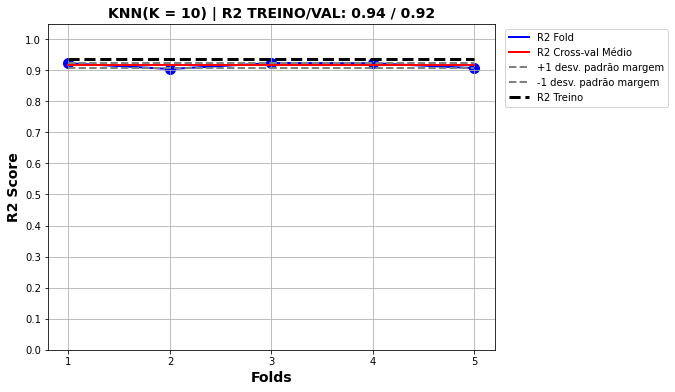

In [361]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = x1, 
                           y = y1, 
                           num_folds = 5)

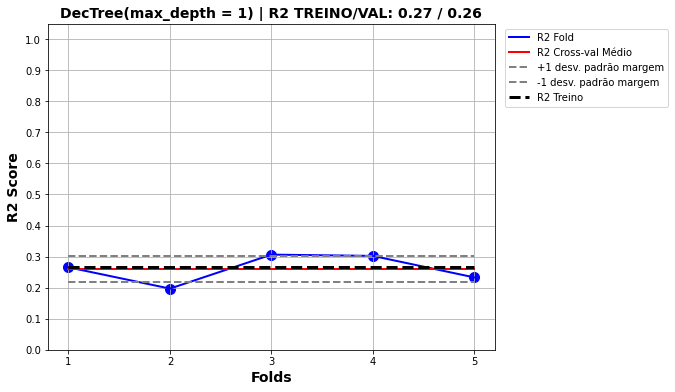

In [388]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = x1, 
                           y = y1, 
                           num_folds = 5)

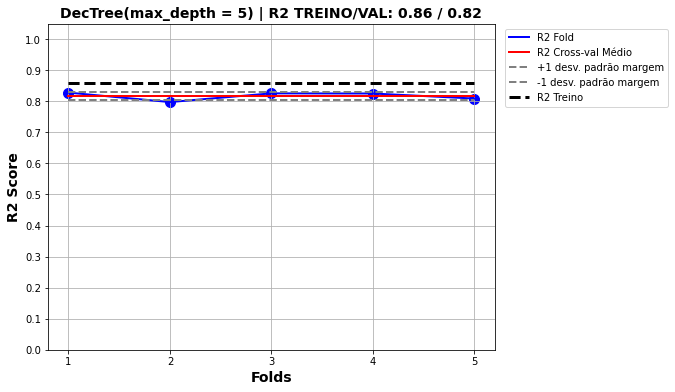

In [389]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = x1, 
                           y = y1, 
                           num_folds = 5)

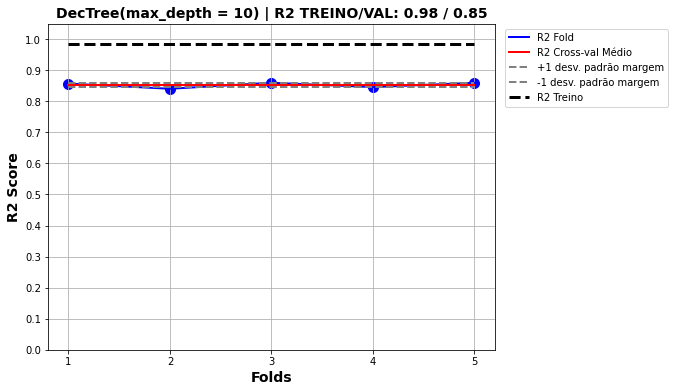

In [390]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = x1, 
                           y = y1, 
                           num_folds = 5)

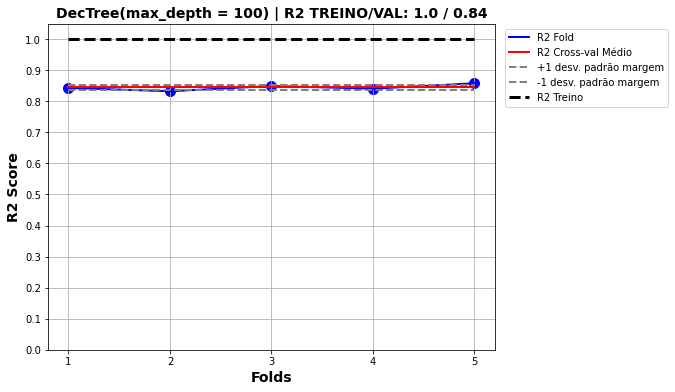

In [391]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = x1, 
                           y = y1, 
                           num_folds = 5)

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.

In [362]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [363]:
x3=df1[["perc_pol","taxa_crim","nivel_ed","ind_pop_cid"]]
y3=df1.crimes
type(x3), x3.shape

(pandas.core.frame.DataFrame, (1845, 4))

In [364]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(x3, y3)
    
    preds = knn.predict(x3)
    
    rmse_train = RMSE(ytrue = y3, ypred = preds)
    r2_train = r2_score(y_true = y3, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:0.0 / R2: 1.0
K = 2 | RMSE:21.93 / R2: 0.97
K = 5 | RMSE:27.8 / R2: 0.95
K = 10 | RMSE:30.57 / R2: 0.94
K = 20 | RMSE:33.31 / R2: 0.92
K = 50 | RMSE:38.33 / R2: 0.9


In [365]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = x3, 
                                 y = y3, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(x3, y3)
    r2_train = r2_score(y_true=y3, y_pred=modelo.predict(x3))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

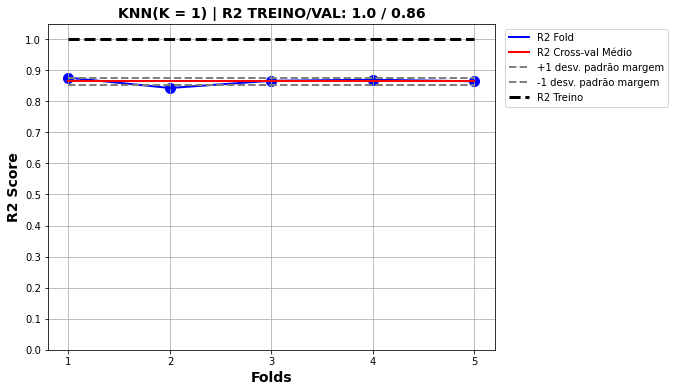

In [366]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = x3, 
                           y = y3, 
                           num_folds = 5)

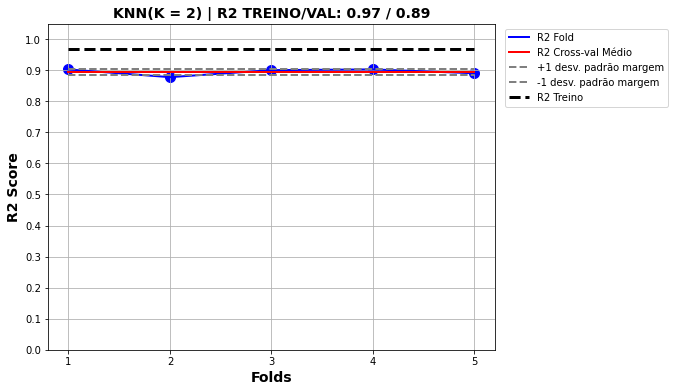

In [367]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 2),
                           nome_modelo = 'KNN(K = 2)',
                           X = x3, 
                           y = y3, 
                           num_folds = 5)

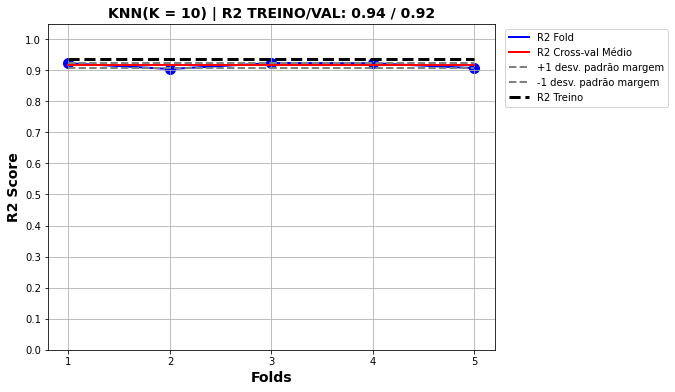

In [368]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = x3, 
                           y = y3, 
                           num_folds = 5)

Aparentemente com KNN igual a 10, utilizando todas as variaveis no treino, não está sofrendo overfitting.